
###   Final Year Project 


In [218]:
import numpy as np
import cv2
from IPython.display import Image #this is to render predictions

In [43]:
!pip install -r requirements.txt

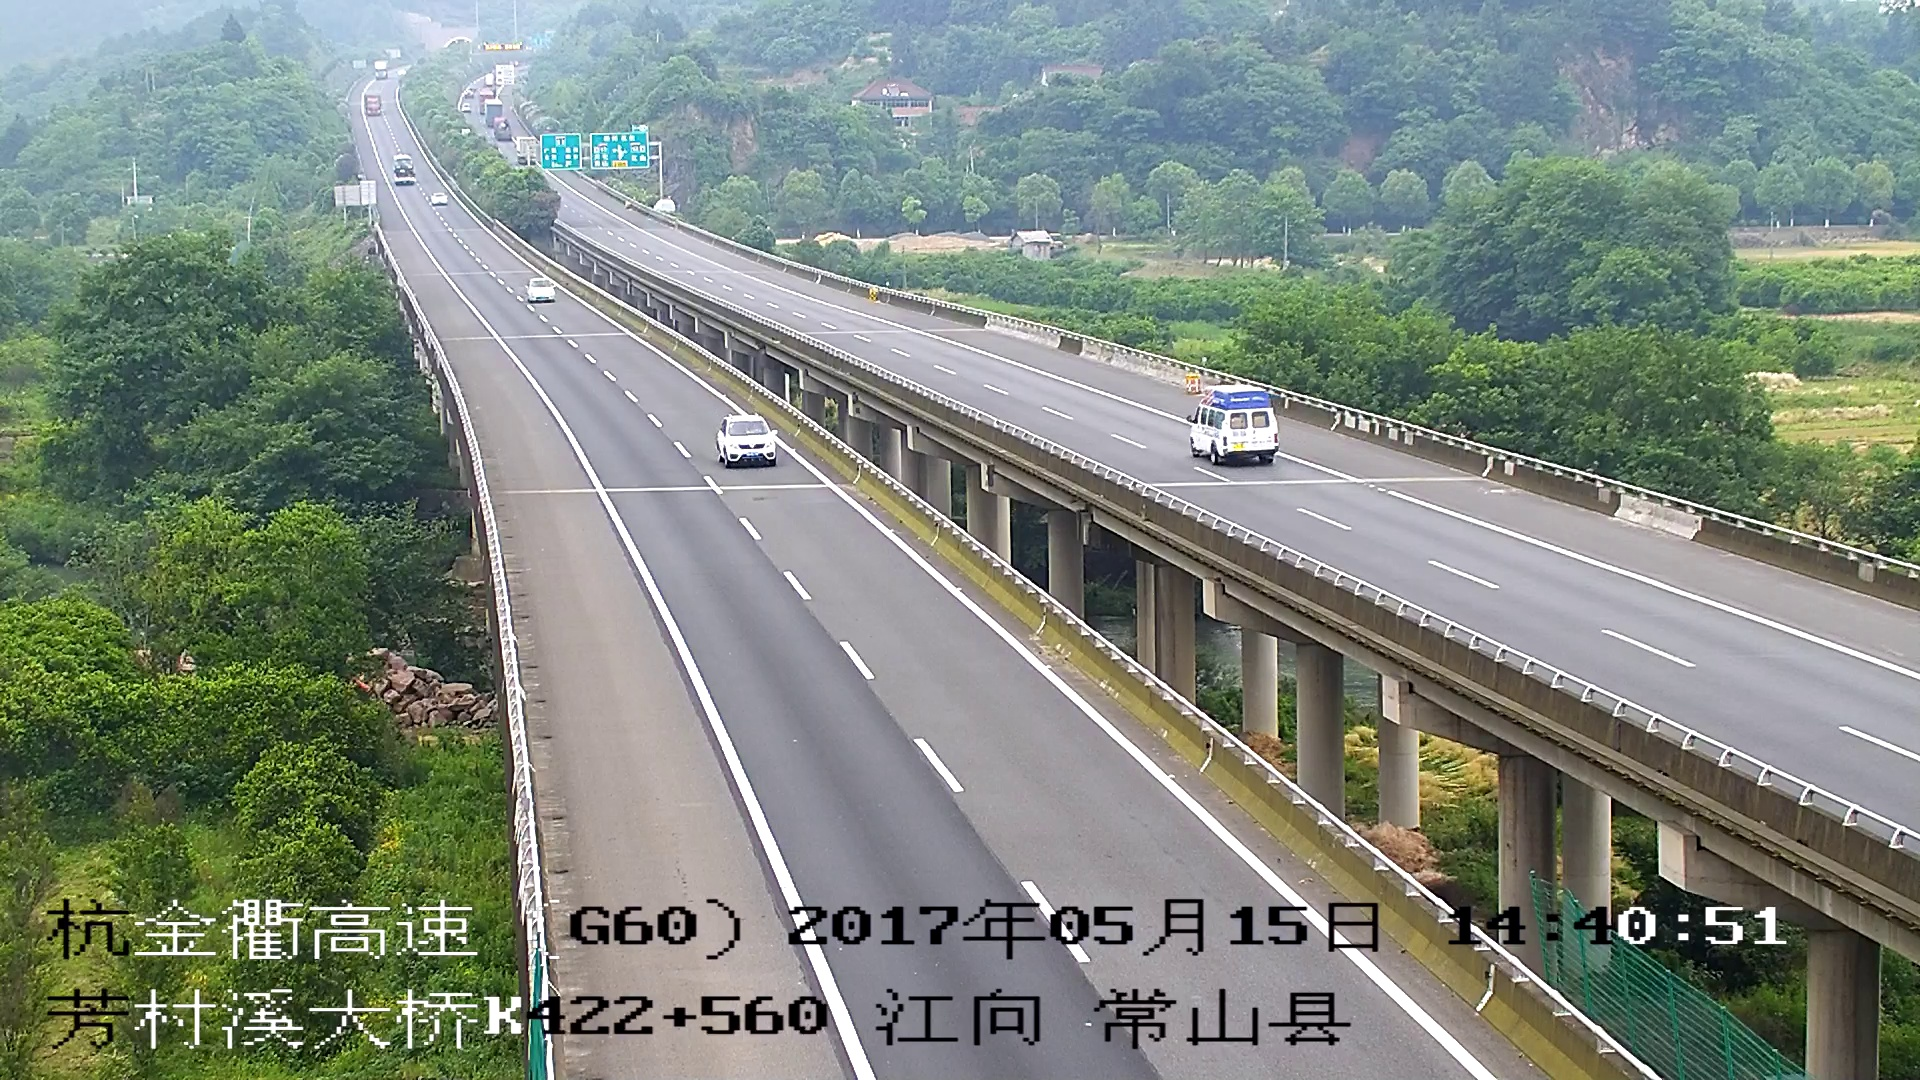

In [294]:

Image(filename='E:/code/Vehicle_Count/Traffic_Signs_Dataset/images/000000.jpg', width=700)

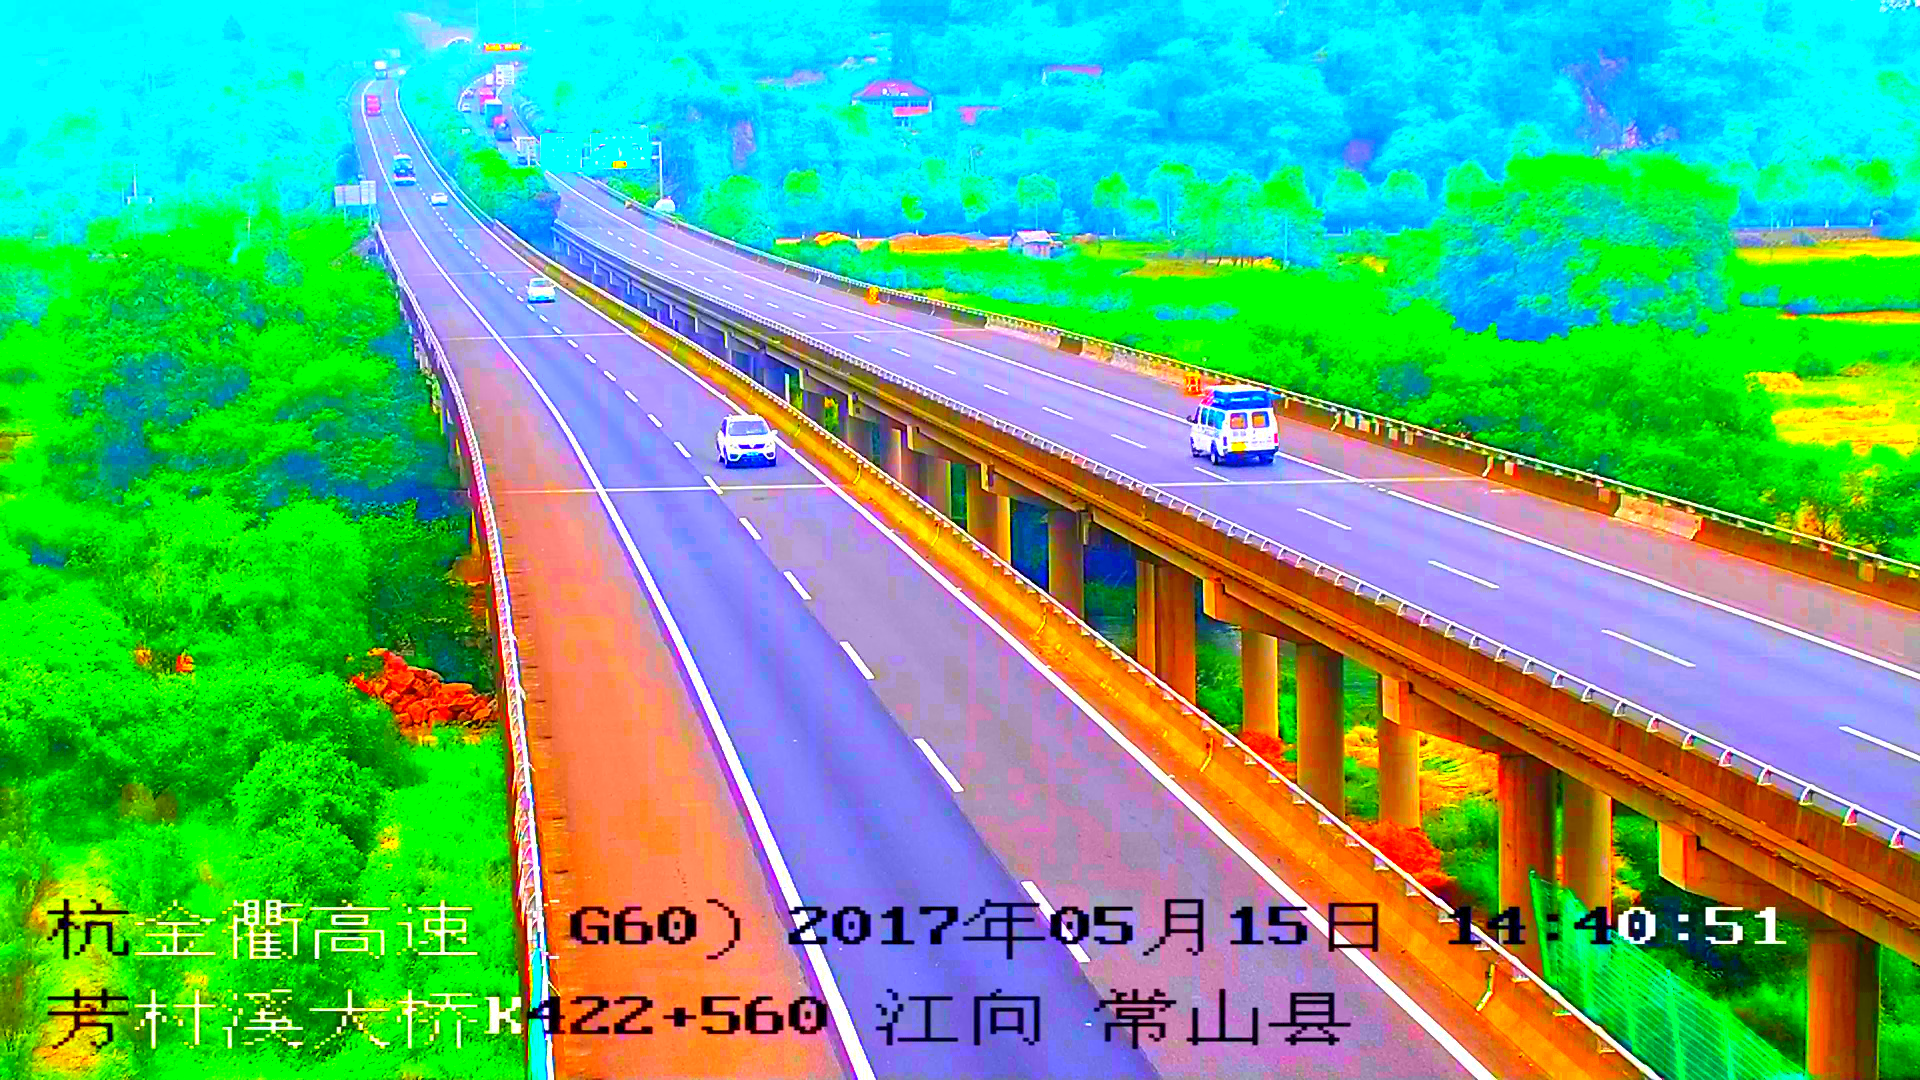

In [295]:
from PIL import Image ,ImageEnhance
file = "E:/code/Vehicle_Count/Traffic_Signs_Dataset/images/000000.jpg"
img = Image.open(file)
converter = ImageEnhance.Color(img)
img_enhance = converter.enhance(12)

img_enhance

In [296]:
from PIL import Image
# Image.fromarray(image_array).save('E:/code/Vehicle_Count/Traffic_Signs_Dataset/00000q.jpg')
# img = Image.open('loadimage.jpg')
img = img_enhance.save('E:/code/Vehicle_Count/Traffic_Signs_Dataset/results/000000_img_enhance.jpg')

In [297]:
### Creating green mask

# img = cv2.imread("E:/code/Vehicle_Count/Traffic_Signs_Dataset/images/000000_img_enhance.jpg")

# hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# greenMask = cv2.inRange(hsv, (0, 51, 0), (102, 255, 102))

# img[greenMask == 255] = (0, 250, 0)

In [298]:
# import numpy as np
# from PIL import Image
# Image.fromarray(img).save('E:/code/Vehicle_Count/Traffic_Signs_Dataset/images/000000_img_enhance_green.jpg')


In [299]:
# from IPython.display import Image #this is to render predictions
# Image(filename='E:/code/Vehicle_Count/Traffic_Signs_Dataset/images/000000_img_enhance_green.jpg', width=700)

In [351]:
import numpy as np
from PIL import Image
# Open image and make RGB and HSV versions
RGBim = img_enhance
HSVim = RGBim.convert('HSV')

# Make numpy versions
RGBna = np.array(RGBim)
HSVna = np.array(HSVim)

# Extract Hue
H = HSVna[:,:,0]

# Find all green pixels, i.e. where 100 < Hue < 140
lo,hi = 100,150
# Rescale to 0-255, rather than 0-360 because we are using uint8
lo = int((lo * 255) / 360)
hi = int((hi * 255) / 360)
green = np.where((H>lo) & (H<hi))

# # Make all green pixels black in original image
# RGBna[green] = [0,0,0]

# count = green[1].size
# print("Pixels matched: {}".format(count))
# Image.fromarray(RGBna).save('E:/code/Vehicle_Count/Traffic_Signs_Dataset/results/000000_img_enhance_green_remove.jpg')

In [352]:
green

(array([  43,   43,   43, ..., 1079, 1079, 1079], dtype=int64),
 array([ 496,  497,  512, ..., 1917, 1918, 1919], dtype=int64))

In [353]:
RGBim = Image.open("E:/code/Vehicle_Count/Traffic_Signs_Dataset/images/000000.jpg").convert('RGB')

# Make numpy versions
RGBna = np.array(RGBim)
# Make all green pixels black in original image
RGBna[green] = [96,96,96]

count = green[0].size
print("Pixels matched: {}".format(count))
Image.fromarray(RGBna).save('E:/code/Vehicle_Count/Traffic_Signs_Dataset/results/000000_green_remove.jpg')

Pixels matched: 543442


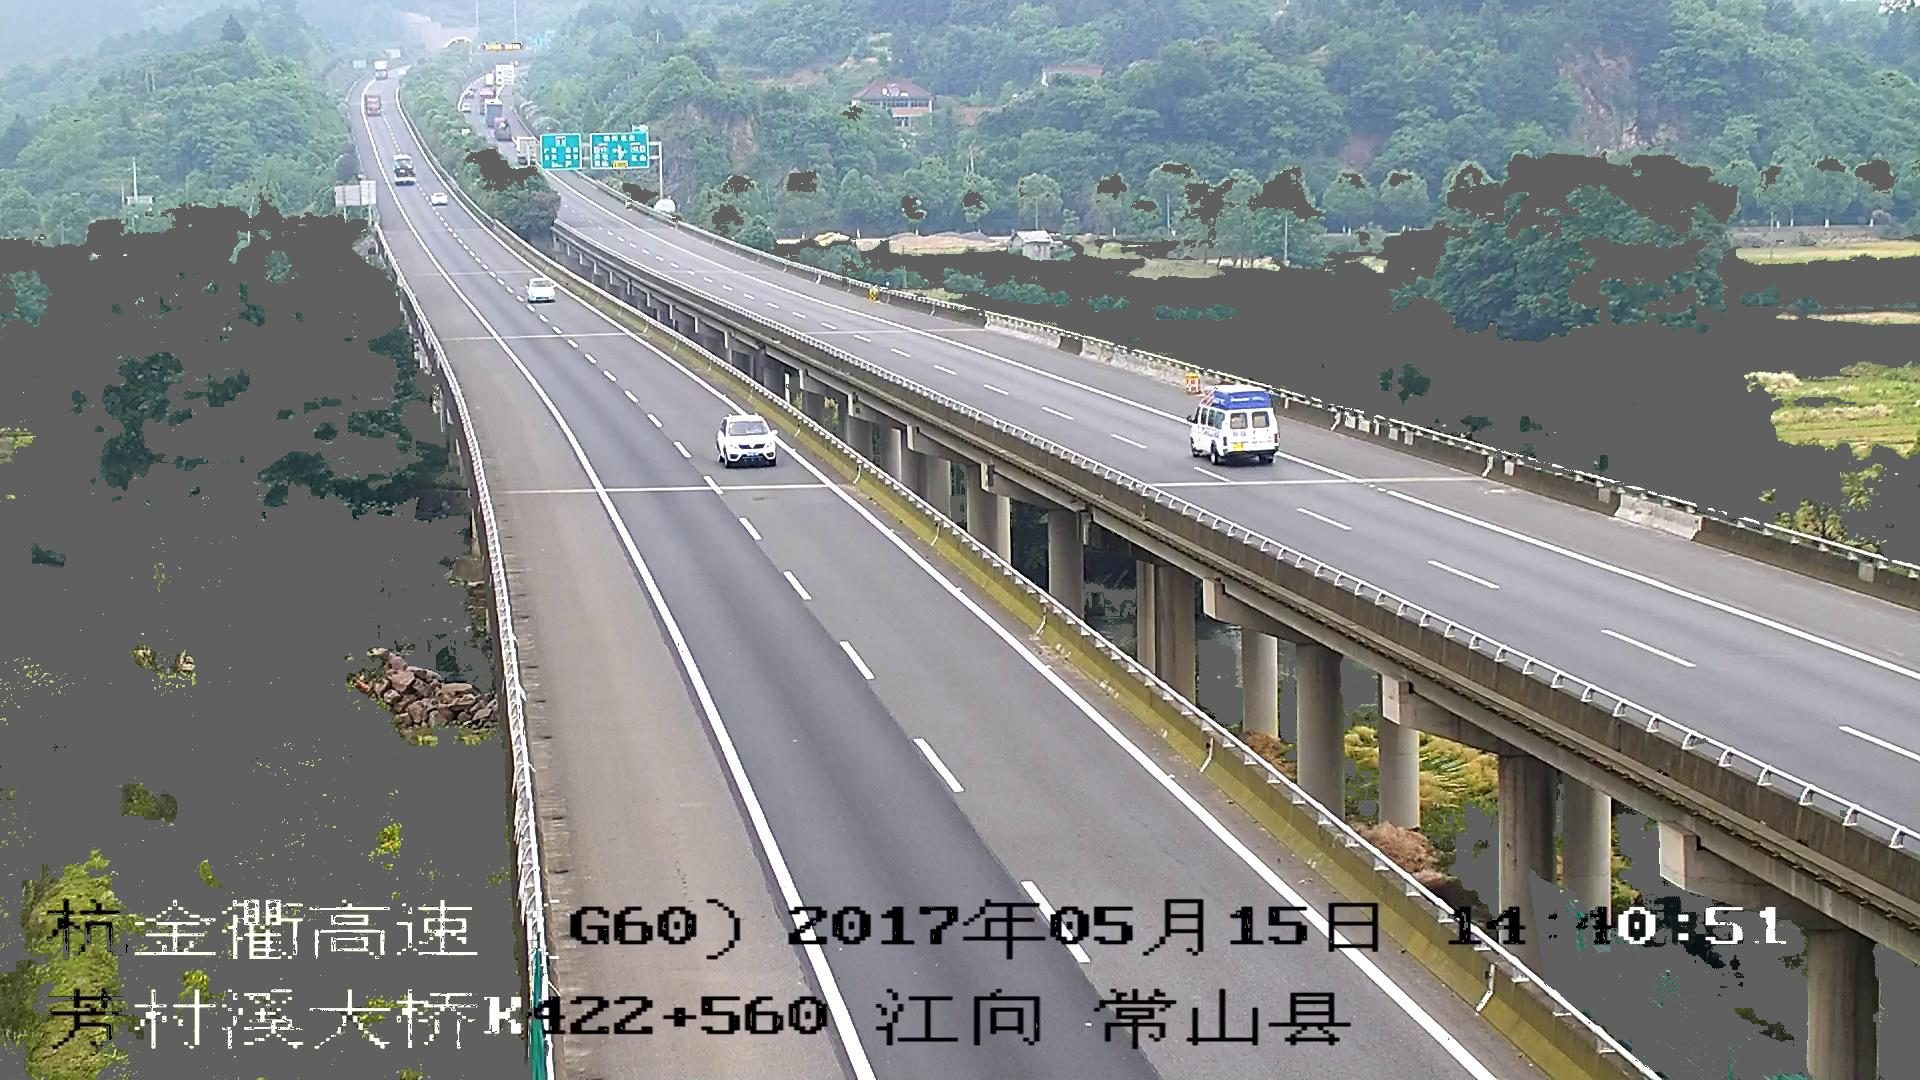

In [354]:
from IPython.display import Image #this is to render predictions
Image(filename='E:/code/Vehicle_Count/Traffic_Signs_Dataset/results/000000_green_remove.jpg', width=700)

In [355]:
##img = cv2.imread("E:/code/Vehicle_Count/Traffic_Signs_Dataset/results/000000_img_enhance_green_remove.jpg")
# img = cv2.imread("E:/code/Vehicle_Count/Traffic_Signs_Dataset/results/000000_green_remove.jpg")
# h, w, c = img.shape
# print(h)
# crop_img = img[0:h-175,0:w]
######## crop_img = img
###### cv2.imshow("cropped", crop_img)
#### cv2.waitKey(0)
## cv2.destroyAllWindows()

In [356]:
import numpy as np
from PIL import Image
# image_path='E:/code/Vehicle_Count/Traffic_Signs_Dataset/results/000000_img_enhance_green_remove_crop.jpg'
image_path='E:/code/Vehicle_Count/Traffic_Signs_Dataset/results/000000_green_remove.jpg'
# Image.fromarray(crop_img).save(image_path)


In [357]:
!python detect.py --source {image_path} --conf 0.25 --save-txt --save-conf --project E:/code/Vehicle_Count/Traffic_Signs_Dataset/results 

detect: weights=yolov5s.pt, source=E:/code/Vehicle_Count/Traffic_Signs_Dataset/results/000000_green_remove.jpg, data=data\coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=E:/code/Vehicle_Count/Traffic_Signs_Dataset/results, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5  v6.1-253-g75bbaa8 Python-3.10.4 torch-1.11.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 E:\code\Vehicle_Count\Traffic_Signs_Dataset\results\000000_green_remove.jpg: 384x640 4 cars, 1 truck, Done. (0.208s)
Speed: 1.0ms pre-process, 208.4ms inference, 2.0ms NMS per image at shape (1, 3, 640, 640)
Results saved to E:\code\Vehicle_Count\Traffic_Signs_Dataset\results\exp2
1 labels saved to E:\code\Vehicle_Co

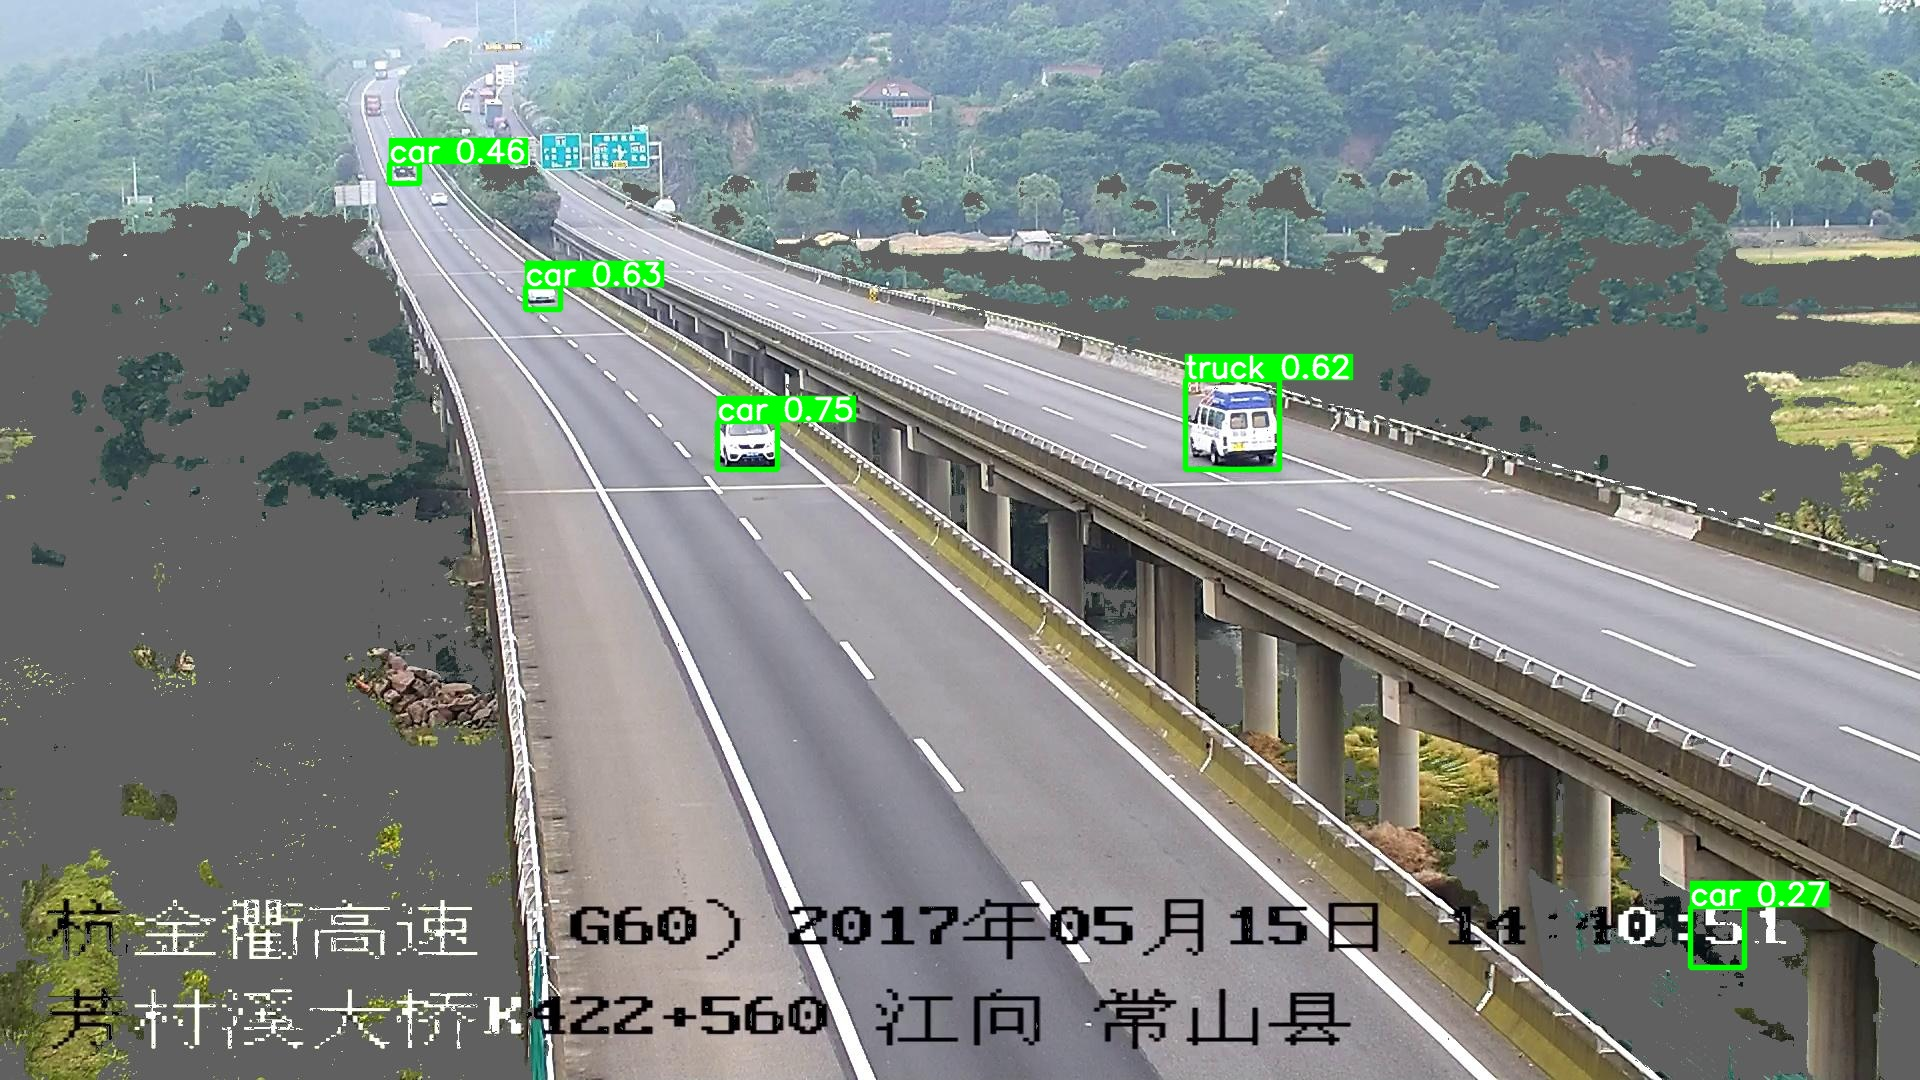

In [358]:
from IPython.display import Image #this is to render predictions
Image(filename='E:/code/Vehicle_Count/Traffic_Signs_Dataset/results/exp2/000000_green_remove.jpg', width=700)

In [317]:
#Print vehicle count
try:
    file1 = open('E:/code/Vehicle_Count/Traffic_Signs_Dataset/results/exp12/labels/000000_green_remove.txt', 'r')
    Lines = file1.readlines()

    total_count = 0
    car_count = 0
    bus_count = 0
    truck_count = 0
    
    # Strips the newline character
    for line in Lines:
        if(line.strip().split()[0]=="2"):
            car_count+=1
        elif(line.strip().split()[0]=="5"):
            bus_count+=1
        elif(line.strip().split()[0]=="7"):
            truck_count+=1
    total_count=car_count+bus_count+truck_count
    print("______________________\n")
    print("  Total Vehicles: {}".format(total_count))
    print("______________________")
    
except:
    print("______________________\n")
    print("  Total Vehicles: {}".format(0))
    print("______________________")




______________________

  Total Vehicles: 4
______________________
